# Practical 5C

This practical is related to Example 1(b).
<br> Use the functions developed in Practical 5B to create the PCA results table, scree plot, loading plot and score plot.

## Task 1
Obtain the PCA results table. (Hint: You need to standardize the data first.)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

In [22]:
data = pd.read_csv("Chp5Eg1.csv")
data.head()

,Social Class/ No. of children,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,B2,332,428,354,1437,526,247,427
1,W2,293,559,388,1527,567,239,258
2,U2,372,767,562,1948,927,235,433
3,B3,406,563,341,1507,544,324,407
4,W3,386,608,396,1501,558,319,363


In [23]:
data_reduced = data.drop(['Social Class/ No. of children'], axis=1)
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,558,319,363


In [24]:
data_reduced = data.drop(['Social Class/ No. of children'], axis=1)
data_reduced.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,332,428,354,1437,526,247,427
1,293,559,388,1527,567,239,258
2,372,767,562,1948,927,235,433
3,406,563,341,1507,544,324,407
4,386,608,396,1501,558,319,363


In [25]:
data_standardized = (data_reduced - data_reduced.mean())/data_reduced.std()
data_standardized.head()

,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
0,-1.080043,-1.606935,-0.914640,-1.136449,-1.098235,-0.949823,0.813809
1,-1.457251,-0.914473,-0.708695,-0.909033,-0.933097,-1.018125,-1.540548
2,-0.693162,0.185009,0.345261,0.154769,0.516896,-1.052276,0.897395
3,-0.364313,-0.893329,-0.993384,-0.959569,-1.025736,-0.292417,0.535187
4,-0.557753,-0.655460,-0.660237,-0.974731,-0.969347,-0.335106,-0.077782


In [26]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=7).fit(data_standardized)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_standardized)

In [27]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [28]:
pca_results = pca_results(data_standardized, pca)
pca_results

,Eigenvalue,Explained Variance,Bread,Vegetables,Fruit,Meat,Poultry,Milk,Wine
PC 1,4.2992,0.6142,0.2324,0.4657,0.4505,0.4658,0.4355,0.2781,-0.2054
PC 2,1.8490,0.2641,0.6259,0.0993,-0.1963,-0.1325,-0.1994,0.5193,0.4826
PC 3,0.6469,0.0924,0.0181,-0.0829,0.1351,0.1979,0.3811,-0.4631,0.7587
PC 4,0.1205,0.0172,-0.5633,0.0738,0.5375,-0.0999,-0.3144,0.3954,0.3510
PC 5,0.0613,0.0088,-0.0214,0.8403,-0.0745,-0.3247,-0.1949,-0.3755,0.0590
PC 6,0.0218,0.0031,0.4859,-0.2263,0.6551,-0.2071,-0.3243,-0.3392,-0.1430
PC 7,0.0013,0.0002,-0.0112,-0.0610,0.1293,-0.7537,0.6191,0.1616,-0.0452


## Task 2
Obtain the scree plot.

<Figure size 640x480 with 0 Axes>

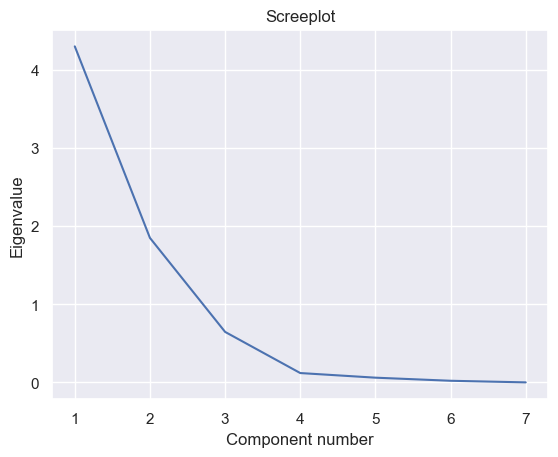

In [29]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

## Task 3
Obtain the loading plot.

In [30]:
#Extract only the two PCs
pca2 = PCA(n_components=2).fit(data_standardized)
scores2 = pca2.transform(data_standardized)

In [31]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

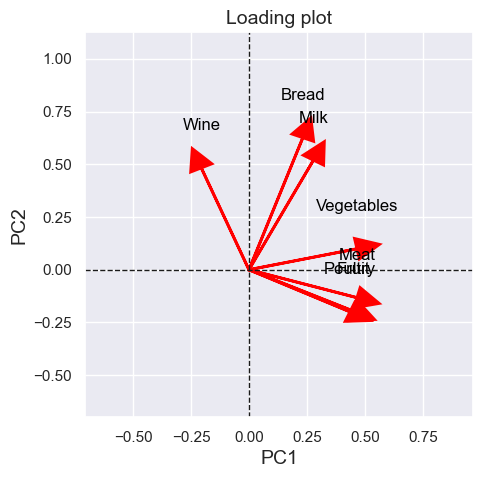

In [32]:
plt.clf
ax2 = loadingplot(data_reduced, pca)  # Students to fill in
plt.show()

## Task 4
Obtain the score plot.

In [33]:
#Obtain scores from original data that are not centred

scores2_notcentred = np.dot(data_standardized, pca2.components_.T)
scores2_notcentred = pd.DataFrame(scores2_notcentred, columns = ['PC1', 'PC2'])
scores2_notcentred.head()

,PC1,PC2
0,-2.850333,-0.387048
1,-1.880200,-1.829470
2,-0.099194,-0.720210
3,-2.033146,0.316302
4,-1.685698,-0.173740


In [40]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    
    # Print text
    text_pos = 0.5
    for i, v in enumerate(np.array(scores)):
        ax.text(v[0], v[1]+text_pos, data.iloc[i,0], color='black', ha='center', va='center', fontsize=12)
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

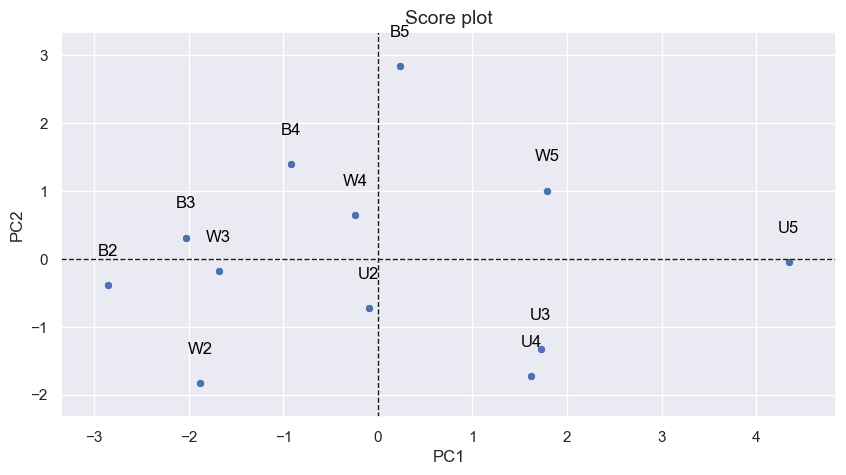

In [42]:
plt.clf
ax3 = scoreplot_label(data, scores2_notcentred, pca, width=10)
plt.show()